In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [30]:
credit_df = pd.read_csv('CreditRisk.csv')

In [31]:
credit_df.shape

(614, 13)

In [32]:
credit_df.iloc[0:5,1:7]

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome
0,Male,No,0,Graduate,No,5849
1,Male,Yes,1,Graduate,No,4583
2,Male,Yes,0,Graduate,Yes,3000
3,Male,Yes,0,Not Graduate,No,2583
4,Male,No,0,Graduate,No,6000


In [33]:
credit_df.iloc[0:5,7:]

,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0.0,0,360.0,1.0,Urban,1
1,1508.0,128,360.0,1.0,Rural,0
2,0.0,66,360.0,1.0,Urban,1
3,2358.0,120,360.0,1.0,Urban,1
4,0.0,141,360.0,1.0,Urban,1


In [34]:
credit_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,0,360.0,1.0,Urban,1
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141,360.0,1.0,Urban,1


In [35]:
credit_df.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71,360.0,1.0,Rural,1
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40,180.0,1.0,Rural,1
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253,360.0,1.0,Urban,1
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187,360.0,1.0,Urban,1
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133,360.0,0.0,Semiurban,0


In [36]:
credit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    int64  
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    int64  
dtypes: float64(3), int64(3), object(7)
memory usage: 62.5+ KB


In [37]:
credit_df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
count,614.000000,614.000000,614.000000,600.00000,564.000000,614.000000
mean,5403.459283,1621.245798,141.166124,342.00000,0.842199,0.687296
std,6109.041673,2926.248369,88.340630,65.12041,0.364878,0.463973
min,150.000000,0.000000,0.000000,12.00000,0.000000,0.000000
25%,2877.500000,0.000000,98.000000,360.00000,1.000000,0.000000
50%,3812.500000,1188.500000,125.000000,360.00000,1.000000,1.000000
75%,5795.000000,2297.250000,164.750000,360.00000,1.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000,1.000000


In [38]:
credit_df.Loan_Status.value_counts()

1    422
0    192
Name: Loan_Status, dtype: int64

In [39]:
credit_df.groupby(['Education', 'Loan_Status']).Education.count()

Education     Loan_Status
Graduate      0              140
              1              340
Not Graduate  0               52
              1               82
Name: Education, dtype: int64

<AxesSubplot:xlabel='Loan_Status', ylabel='Credit_History'>

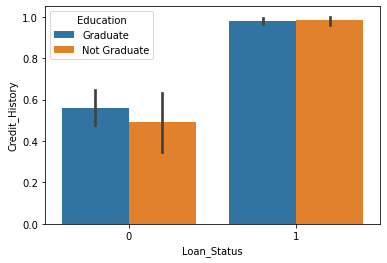

In [40]:
sns.barplot(y = 'Credit_History', x = 'Loan_Status', hue='Education', data = credit_df)

## Fill Null Values

In [41]:
100 * credit_df.isnull().sum() / credit_df.shape[0]

Loan_ID              0.000000
Gender               2.117264
Married              0.488599
Dependents           2.442997
Education            0.000000
Self_Employed        5.211726
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           0.000000
Loan_Amount_Term     2.280130
Credit_History       8.143322
Property_Area        0.000000
Loan_Status          0.000000
dtype: float64

In [42]:
credit_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,0,360.0,1.0,Urban,1
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141,360.0,1.0,Urban,1


In [43]:
object_columns = credit_df.select_dtypes(include=['object']).columns
numeric_columns = credit_df.select_dtypes(exclude=['object']).columns

In [44]:
#credit_df.columns[credit_df.dtypes == object]
#credit_df.columns[credit_df.dtypes == object]

In [45]:
for column in object_columns:
    majority = credit_df[column].value_counts().iloc[0]
    credit_df[column].fillna(majority, inplace=True)

In [46]:
for column in numeric_columns:
    mean = credit_df[column].mean()
    credit_df[column].fillna(mean, inplace=True)

In [47]:
mean

0.6872964169381107

In [48]:
# Impute

In [49]:
credit_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,0,360.0,1.0,Urban,1
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141,360.0,1.0,Urban,1


In [50]:
credit_df.drop('Loan_ID', axis=1, inplace=True)

In [51]:
object_columns = credit_df.select_dtypes(include=['object']).columns

In [52]:
credit_df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,0,360.0,1.0,Urban,1
1,Male,Yes,1,Graduate,No,4583,1508.0,128,360.0,1.0,Rural,0
2,Male,Yes,0,Graduate,Yes,3000,0.0,66,360.0,1.0,Urban,1
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120,360.0,1.0,Urban,1
4,Male,No,0,Graduate,No,6000,0.0,141,360.0,1.0,Urban,1


## Categorical Columns

In [53]:
credit_df[object_columns].Property_Area

0          Urban
1          Rural
2          Urban
3          Urban
4          Urban
         ...    
609        Rural
610        Rural
611        Urban
612        Urban
613    Semiurban
Name: Property_Area, Length: 614, dtype: object

In [54]:
credit_df[object_columns].Property_Area.head()

0    Urban
1    Rural
2    Urban
3    Urban
4    Urban
Name: Property_Area, dtype: object

In [55]:
credit_df_dummy = pd.get_dummies(credit_df, columns=object_columns)

In [56]:
credit_df_dummy.head()


,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Gender_489,Gender_Female,Gender_Male,Married_398,...,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_500,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,5849,0.0,0,360.0,1.0,1,0,0,1,0,...,0,0,1,0,0,1,0,0,0,1
1,4583,1508.0,128,360.0,1.0,0,0,0,1,0,...,0,0,1,0,0,1,0,1,0,0
2,3000,0.0,66,360.0,1.0,1,0,0,1,0,...,0,0,1,0,0,0,1,0,0,1
3,2583,2358.0,120,360.0,1.0,1,0,0,1,0,...,0,0,0,1,0,1,0,0,0,1
4,6000,0.0,141,360.0,1.0,1,0,0,1,0,...,0,0,1,0,0,1,0,0,0,1


In [57]:
list(credit_df_dummy.columns)

['ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History',
 'Loan_Status',
 'Gender_489',
 'Gender_Female',
 'Gender_Male',
 'Married_398',
 'Married_No',
 'Married_Yes',
 'Dependents_345',
 'Dependents_0',
 'Dependents_1',
 'Dependents_2',
 'Dependents_3+',
 'Education_Graduate',
 'Education_Not Graduate',
 'Self_Employed_500',
 'Self_Employed_No',
 'Self_Employed_Yes',
 'Property_Area_Rural',
 'Property_Area_Semiurban',
 'Property_Area_Urban']

In [58]:
# Sklearn - LabelEncoding
# Sklearn - LabelBinarize
# Sklearn - OneHotEncoding

In [59]:
credit_df_dummy.shape

(614, 25)

## Model

In [60]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [61]:
X = credit_df_dummy.drop('Loan_Status', axis=1)
y = credit_df_dummy.Loan_Status
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=0.3, random_state=42)

In [62]:
train_x.shape, test_x.shape

((429, 24), (185, 24))

## Decision Tree

In [63]:
dt_model = DecisionTreeClassifier(max_depth=2, min_samples_leaf=2, min_samples_split=2)

In [64]:
dt_model.fit(train_x, train_y)

DecisionTreeClassifier(max_depth=2, min_samples_leaf=2)

In [65]:
train_y_hat = dt_model.predict(train_x)
test_y_hat = dt_model.predict(test_x)

In [66]:
print('-'*20, 'Train', '-'*20)
print(classification_report(train_y, train_y_hat))
print('-'*20, 'Test', '-'*20)
print(classification_report(test_y, test_y_hat))

-------------------- Train --------------------
              precision    recall  f1-score   support

           0       0.92      0.43      0.59       127
           1       0.80      0.98      0.89       302

    accuracy                           0.82       429
   macro avg       0.86      0.71      0.74       429
weighted avg       0.84      0.82      0.80       429

-------------------- Test --------------------
              precision    recall  f1-score   support

           0       0.93      0.42      0.57        65
           1       0.76      0.98      0.86       120

    accuracy                           0.78       185
   macro avg       0.84      0.70      0.71       185
weighted avg       0.82      0.78      0.76       185



In [67]:
print('-'*20, 'Train', '-'*20)
print(classification_report(train_y, train_y_hat))
print('-'*20, 'Test', '-'*20)
print(classification_report(test_y, test_y_hat))

-------------------- Train --------------------
              precision    recall  f1-score   support

           0       0.92      0.43      0.59       127
           1       0.80      0.98      0.89       302

    accuracy                           0.82       429
   macro avg       0.86      0.71      0.74       429
weighted avg       0.84      0.82      0.80       429

-------------------- Test --------------------
              precision    recall  f1-score   support

           0       0.93      0.42      0.57        65
           1       0.76      0.98      0.86       120

    accuracy                           0.78       185
   macro avg       0.84      0.70      0.71       185
weighted avg       0.82      0.78      0.76       185



## KNN Model

In [68]:
knn_model = KNeighborsClassifier(n_neighbors=7)

In [69]:
knn_model.fit(train_x, train_y)

KNeighborsClassifier(n_neighbors=7)

In [70]:
train_y_hat = knn_model.predict(train_x)
test_y_hat = knn_model.predict(test_x)

print('-'*20, 'Train', '-'*20)
print(classification_report(train_y, train_y_hat))
print('-'*20, 'Test', '-'*20)
print(classification_report(test_y, test_y_hat))

-------------------- Train --------------------
              precision    recall  f1-score   support

           0       0.70      0.24      0.35       127
           1       0.75      0.96      0.84       302

    accuracy                           0.74       429
   macro avg       0.72      0.60      0.60       429
weighted avg       0.73      0.74      0.70       429

-------------------- Test --------------------
              precision    recall  f1-score   support

           0       0.36      0.12      0.18        65
           1       0.65      0.88      0.75       120

    accuracy                           0.62       185
   macro avg       0.51      0.50      0.47       185
weighted avg       0.55      0.62      0.55       185



## Hyperparameter Tuning

In [71]:
from sklearn.model_selection import GridSearchCV

In [72]:
params = {'n_neighbors': [3, 4, 5, 6, 7, 8, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]}

In [73]:
gs = GridSearchCV(estimator=knn_model, param_grid=params)

In [74]:
gs.fit(train_x, train_y)

GridSearchCV(estimator=KNeighborsClassifier(n_neighbors=7),
             param_grid={'n_neighbors': [3, 4, 5, 6, 7, 8, 10, 11, 12, 13, 14,
                                         15, 16, 17, 18, 19, 20]})

In [58]:
gs.best_params_

{'n_neighbors': 7}

In [75]:
params = {'max_depth': range(2,10), 
          'criterion' : ['gini', 'entropy'],
          'min_samples_split' : range(2, 10),
          'min_samples_leaf' : range(2, 10)}

In [76]:
8 * 2 * 8 * 8 * 5

5120

In [77]:
gs = GridSearchCV(estimator=DecisionTreeClassifier(), param_grid=params, n_jobs=4, verbose=2)

In [78]:
gs.fit(train_x, train_y)

Fitting 5 folds for each of 1024 candidates, totalling 5120 fits


GridSearchCV(estimator=DecisionTreeClassifier(), n_jobs=4,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 10),
                         'min_samples_leaf': range(2, 10),
                         'min_samples_split': range(2, 10)},
             verbose=2)

In [64]:
gs.best_params_

{'criterion': 'gini',
 'max_depth': 2,
 'min_samples_leaf': 2,
 'min_samples_split': 2}

In [65]:
## RandomSearchCV
## HyperOpt

## Ensembles

In [82]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

In [87]:
randfor_model = RandomForestClassifier(max_depth=2, min_samples_leaf=2, min_samples_split=2)
grandbo_model = GradientBoostingClassifier()

In [88]:
randfor_model.fit(train_x, train_y)

RandomForestClassifier(max_depth=2, min_samples_leaf=2)

In [89]:
train_y_hat = randfor_model.predict(train_x)
test_y_hat = randfor_model.predict(test_x)

print('-'*20, 'Train', '-'*20)
print(classification_report(train_y, train_y_hat))
print('-'*20, 'Test', '-'*20)
print(classification_report(test_y, test_y_hat))

-------------------- Train --------------------
              precision    recall  f1-score   support

           0       0.95      0.29      0.45       127
           1       0.77      0.99      0.87       302

    accuracy                           0.79       429
   macro avg       0.86      0.64      0.66       429
weighted avg       0.82      0.79      0.74       429

-------------------- Test --------------------
              precision    recall  f1-score   support

           0       1.00      0.18      0.31        65
           1       0.69      1.00      0.82       120

    accuracy                           0.71       185
   macro avg       0.85      0.59      0.57       185
weighted avg       0.80      0.71      0.64       185



In [90]:
grandbo_model.fit(train_x, train_y)

GradientBoostingClassifier()

In [91]:
train_y_hat = grandbo_model.predict(train_x)
test_y_hat = grandbo_model.predict(test_x)

print('-'*20, 'Train', '-'*20)
print(classification_report(train_y, train_y_hat))
print('-'*20, 'Test', '-'*20)
print(classification_report(test_y, test_y_hat))

-------------------- Train --------------------
              precision    recall  f1-score   support

           0       1.00      0.69      0.81       127
           1       0.88      1.00      0.94       302

    accuracy                           0.91       429
   macro avg       0.94      0.84      0.88       429
weighted avg       0.92      0.91      0.90       429

-------------------- Test --------------------
              precision    recall  f1-score   support

           0       0.78      0.38      0.52        65
           1       0.74      0.94      0.83       120

    accuracy                           0.75       185
   macro avg       0.76      0.66      0.67       185
weighted avg       0.75      0.75      0.72       185



## Multi Layered Perceptron

In [79]:
from sklearn.neural_network import MLPClassifier

In [80]:
mlp_model = MLPClassifier((4,4))

In [81]:
mlp_model.fit(train_x, train_y)

MLPClassifier(hidden_layer_sizes=(4, 4))

In [82]:
train_y_hat = mlp_model.predict(train_x)
test_y_hat = mlp_model.predict(test_x)

print('-'*20, 'Train', '-'*20)
print(classification_report(train_y, train_y_hat))
print('-'*20, 'Test', '-'*20)
print(classification_report(test_y, test_y_hat))

-------------------- Train --------------------
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       127
           1       0.70      1.00      0.83       302

    accuracy                           0.70       429
   macro avg       0.35      0.50      0.41       429
weighted avg       0.50      0.70      0.58       429

-------------------- Test --------------------
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        65
           1       0.65      1.00      0.79       120

    accuracy                           0.65       185
   macro avg       0.32      0.50      0.39       185
weighted avg       0.42      0.65      0.51       185



C:\Users\Admin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\metr